## Principal Component Regression (PCR) Analysis

This Jupyter Notebook details the steps taken to preprocess data, perform Principal Component Analysis (PCA), and implement Principal Component Regression (PCR) on the dataset to predict Life Expectancy. We aim to identify the most influential factors and optimize the model for best predictions.


In [55]:
import pandas as pd
url = 'https://raw.githubusercontent.com/liyuhao413/filepit/main/world-data-2023.csv'
data = pd.read_csv(url)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [56]:
def convert_to_numeric(column):
    if column.dtype == 'object':
        column = column.str.replace(',', '').str.replace('%', '').str.replace('$', '')
    return pd.to_numeric(column, errors='coerce')

numeric_columns = data.columns.drop(['Country', 'Abbreviation', 'Capital/Major City', 'Currency-Code', 'Official language', 'Largest city'])
for col in numeric_columns:
    data[col] = convert_to_numeric(data[col])

missing_data_summary = data.isnull().mean().sort_values(ascending=False) * 100
print(missing_data_summary)

Minimum wage                                 23.076923
Tax revenue (%)                              13.333333
Armed Forces size                            12.307692
Gasoline Price                               10.256410
Population: Labor force participation (%)     9.743590
Unemployment rate                             9.743590
CPI                                           8.717949
CPI Change (%)                                8.205128
Currency-Code                                 7.692308
Maternal mortality ratio                      7.179487
Total tax rate                                6.153846
Gross tertiary education enrollment (%)       6.153846
Life expectancy                               4.102564
Physicians per thousand                       3.589744
Out of pocket health expenditure              3.589744
Gross primary education enrollment (%)        3.589744
Fertility Rate                                3.589744
Co2-Emissions                                 3.589744
Agricultur

In [57]:
data_cleaned = data.drop(columns=data.columns[data.isnull().mean() == 1])

for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)

missing_values=data_cleaned.isnull().mean().sort_values(ascending=False) * 100
print(missing_values)

Currency-Code                                7.692308
Abbreviation                                 3.589744
Largest city                                 3.076923
Official language                            2.564103
Capital/Major City                           1.538462
Physicians per thousand                      0.000000
Life expectancy                              0.000000
Maternal mortality ratio                     0.000000
Minimum wage                                 0.000000
Out of pocket health expenditure             0.000000
Country                                      0.000000
Population                                   0.000000
Infant mortality                             0.000000
Tax revenue (%)                              0.000000
Total tax rate                               0.000000
Unemployment rate                            0.000000
Urban_population                             0.000000
Latitude                                     0.000000
Population: Labor force part

## Exploratory Data Analysis (EDA)

Visualize data distributions and relationships to identify key variables and check for any anomalies or patterns.


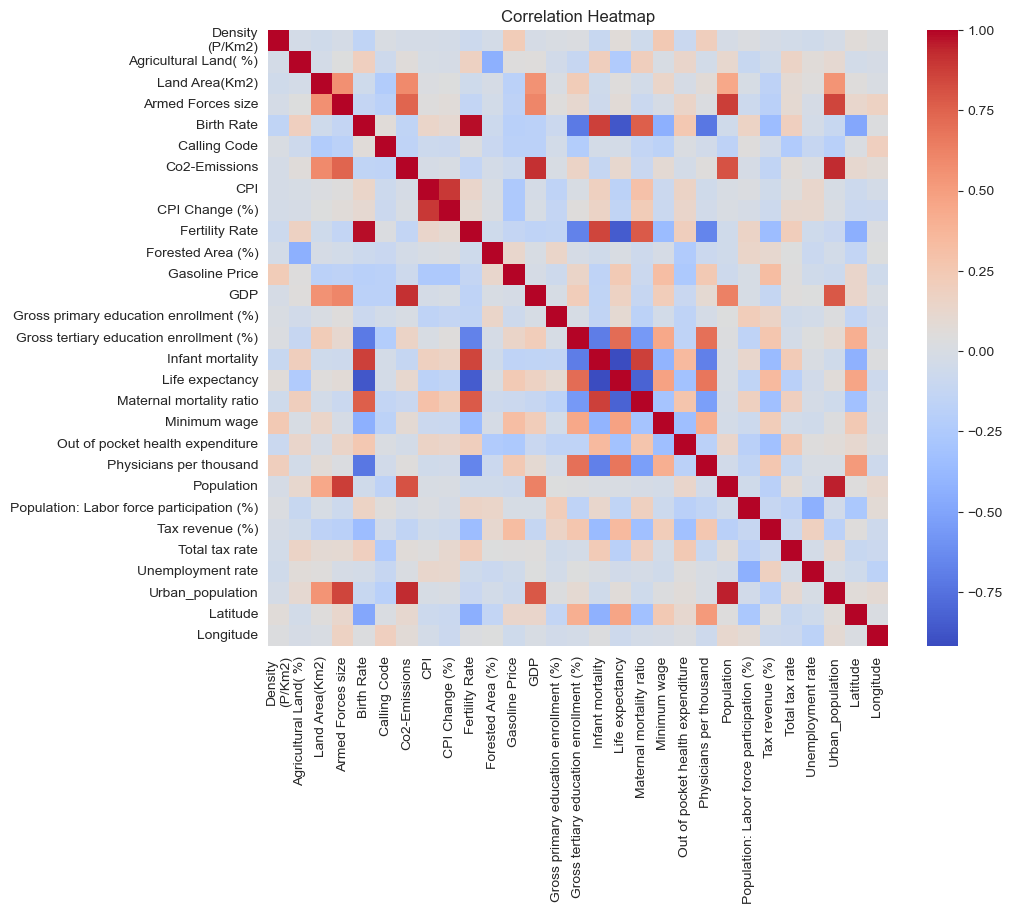

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

data_cleaned.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,0.002202,AF,0.701220,0.038146,0.106565,0.661772,0.049067,Kabul,0.000875,...,0.960688,0.032105,0.027217,0.223361,0.250000,0.299622,0.392666,0.011616,0.706944,0.687612
1,Albania,0.003911,AL,0.518293,0.001681,0.002969,0.146341,0.188800,Tirana,0.000457,...,0.696560,0.141498,0.002041,0.362705,0.500000,0.135161,0.435742,0.002067,0.775091,0.553034
2,Algeria,0.000608,DZ,0.204878,0.139297,0.104586,0.457442,0.113067,Algiers,0.015162,...,0.342752,0.203329,0.030802,0.065574,1.000000,0.274575,0.413314,0.037375,0.651163,0.500640
3,Andorra,0.006152,AD,0.480488,0.000027,0.010228,0.032354,0.200000,Andorra la Vella,0.000046,...,0.444717,0.394768,0.000055,0.501025,0.438172,0.137996,0.187611,0.000074,0.787871,0.500250
4,Angola,0.000911,AO,0.571951,0.072914,0.038601,0.866849,0.129600,Luanda,0.003506,...,0.407862,0.023781,0.022769,0.809426,0.247312,0.194234,0.242079,0.024979,0.280529,0.546539


In [60]:
from sklearn.decomposition import PCA
import numpy as np

# Initializing PCA
pca = PCA()

pca.fit(data_cleaned[numeric_cols])

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

pca_results = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_variance
})

print(pca_results)

    Principal Component  Explained Variance Ratio  Cumulative Variance
0                     1                  0.342847             0.342847
1                     2                  0.114186             0.457033
2                     3                  0.075444             0.532478
3                     4                  0.060614             0.593092
4                     5                  0.058614             0.651705
5                     6                  0.049181             0.700887
6                     7                  0.041388             0.742275
7                     8                  0.036822             0.779096
8                     9                  0.031115             0.810211
9                    10                  0.026515             0.836727
10                   11                  0.024883             0.861610
11                   12                  0.019600             0.881210
12                   13                  0.018809             0.900019
13    

The PCA results show how the variance in the data is distributed across different principal components:

The first principal component explains about 34.2% of the variance.
The second component accounts for an additional 11.4%, bringing the cumulative variance explained to about 45.7%.
By the tenth component, we've accounted for approximately 81.16% of the variance in the dataset.
To select the number of components for Principal Component Regression (PCR), we typically look for the point where the cumulative explained variance reaches a reasonable threshold, such as 80-90%. In this case, using the first 10 principal components could be a good choice for a balance between dimensionality reduction and information retention.

In [61]:
loadings = pd.DataFrame(pca.components_, columns=numeric_cols).T

loadings_first_10 = loadings.iloc[:, :10]
print(loadings_first_10)

                                                  0         1         2  \
Density\n(P/Km2)                          -0.017463  0.002193 -0.034532   
Agricultural Land( %)                      0.109586 -0.573510 -0.517011   
Land Area(Km2)                            -0.018641 -0.036257  0.073319   
Armed Forces size                         -0.019436 -0.081886  0.153145   
Birth Rate                                 0.417399  0.023055 -0.057968   
Calling Code                               0.017446  0.034171  0.103086   
Co2-Emissions                             -0.021127 -0.044651  0.052448   
CPI                                        0.026963 -0.012772  0.047672   
CPI Change (%)                             0.022632 -0.012872  0.052660   
Fertility Rate                             0.352218  0.024638 -0.080229   
Forested Area (%)                         -0.030303  0.563672  0.103744   
Gasoline Price                            -0.079869  0.047124 -0.320528   
GDP                      

# Insights from the Loadings:
- Principal Component 1 (PC1) is strongly influenced by variables related to population health and demographics, such as Birth Rate, Infant mortality, Life expectancy, and Maternal mortality ratio. It represents a general health and demographic factor.
- Principal Component 2 (PC2) is heavily influenced by variables like Armed Forces size, Co2-Emissions, and Urban_population, suggesting it captures aspects of a country's scale and industrial activity.
- PC3 has strong loadings for economic indicators like CPI and CPI Change (%), reflecting economic stability and inflation aspects.
- PC4 through PC10 show mixed contributions from various other socio-economic and environmental factors.

# Selection for PCR:
Variables that consistently show strong loadings across the first few components are more influential and can be prioritized in the regression model. For instance, variables such as Birth Rate, Life expectancy, Urban_population, and Population might be especially relevant for further modeling.

Visualizing some of the PCA results to better understand the distribution and importance of the principal components

C:\Users\artem\AppData\Local\Temp\ipykernel_21376\2109238911.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=pca_results, ax=ax[0], palette='viridis')


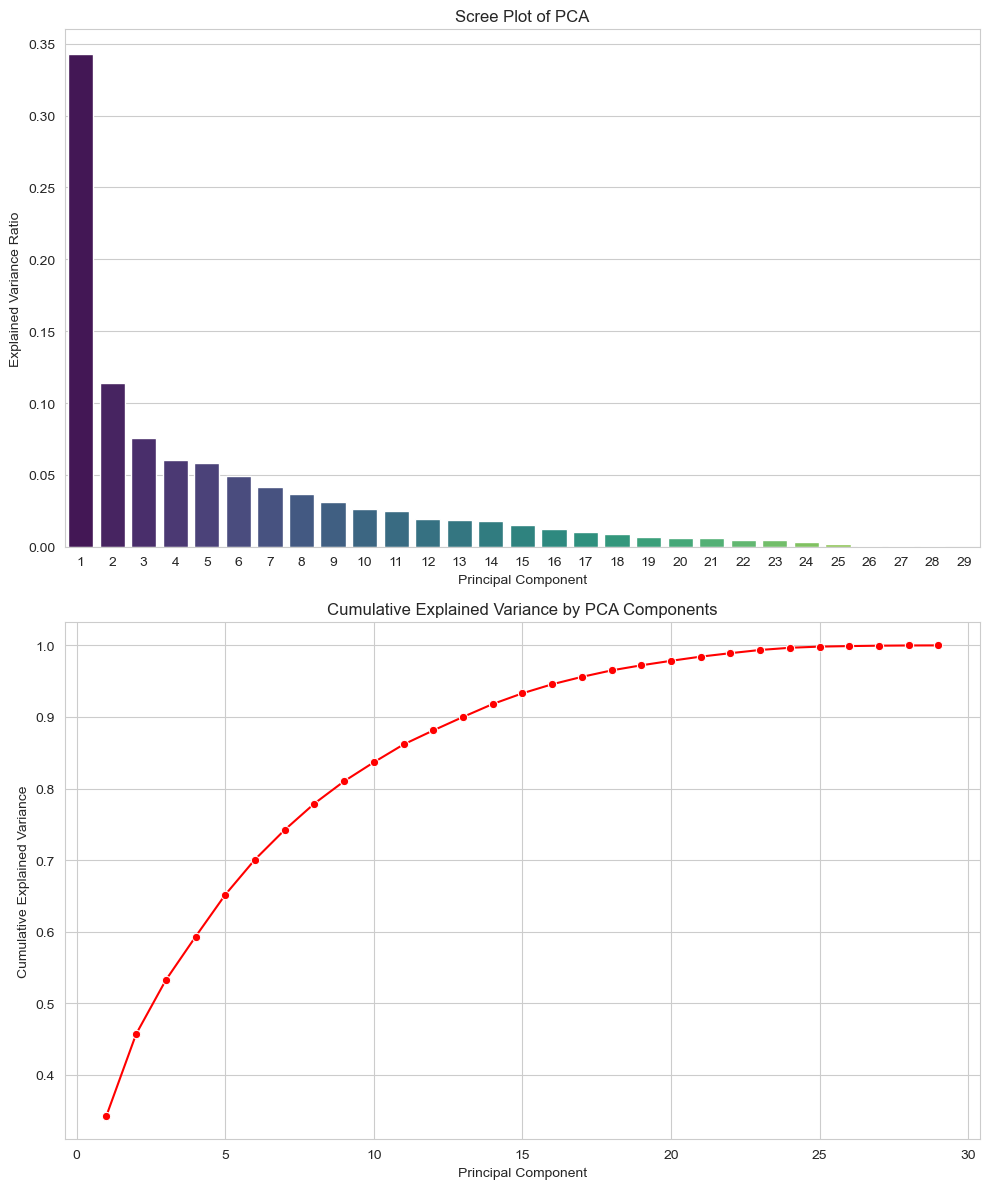

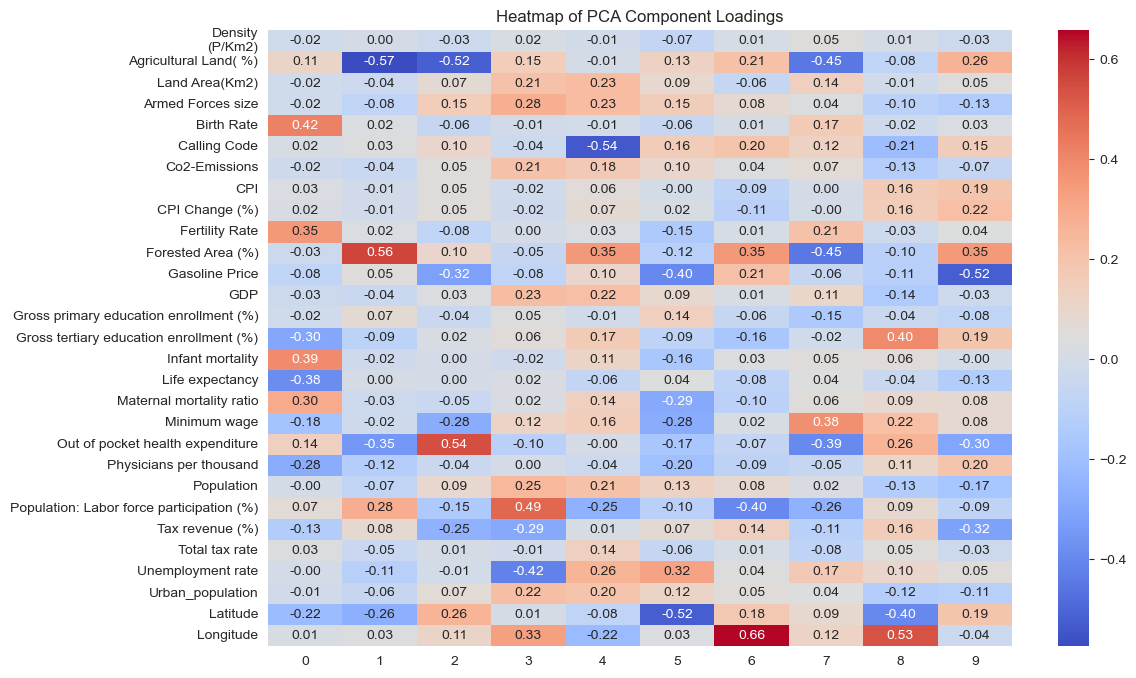

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=pca_results, ax=ax[0], palette='viridis')
ax[0].set_title('Scree Plot of PCA')
ax[0].set_ylabel('Explained Variance Ratio')

sns.lineplot(x='Principal Component', y='Cumulative Variance', data=pca_results, marker='o', ax=ax[1], color='red')
ax[1].set_title('Cumulative Explained Variance by PCA Components')
ax[1].set_ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_first_10, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of PCA Component Loadings')
plt.show()

In [63]:
correlations = data_cleaned[numeric_cols].corr()
co2_correlations = correlations['Co2-Emissions'].sort_values(ascending=False)
life_exp_correlations = correlations['Life expectancy'].sort_values(ascending=False)

correlation_comparison = pd.DataFrame({
    'Co2-Emissions': co2_correlations,
    'Life Expectancy': life_exp_correlations
})

correlation_comparison.head(10) 

,Co2-Emissions,Life Expectancy
Agricultural Land( %),0.061898,-0.240095
Armed Forces size,0.742572,0.071427
Birth Rate,-0.149560,-0.867507
CPI,-0.014447,-0.176028
CPI Change (%),-0.001040,-0.144924
Calling Code,-0.156016,-0.033359
Co2-Emissions,1.000000,0.117827
Density\n(P/Km2),-0.019218,0.064183
Fertility Rate,-0.136899,-0.846445
Forested Area (%),-0.027207,0.005924


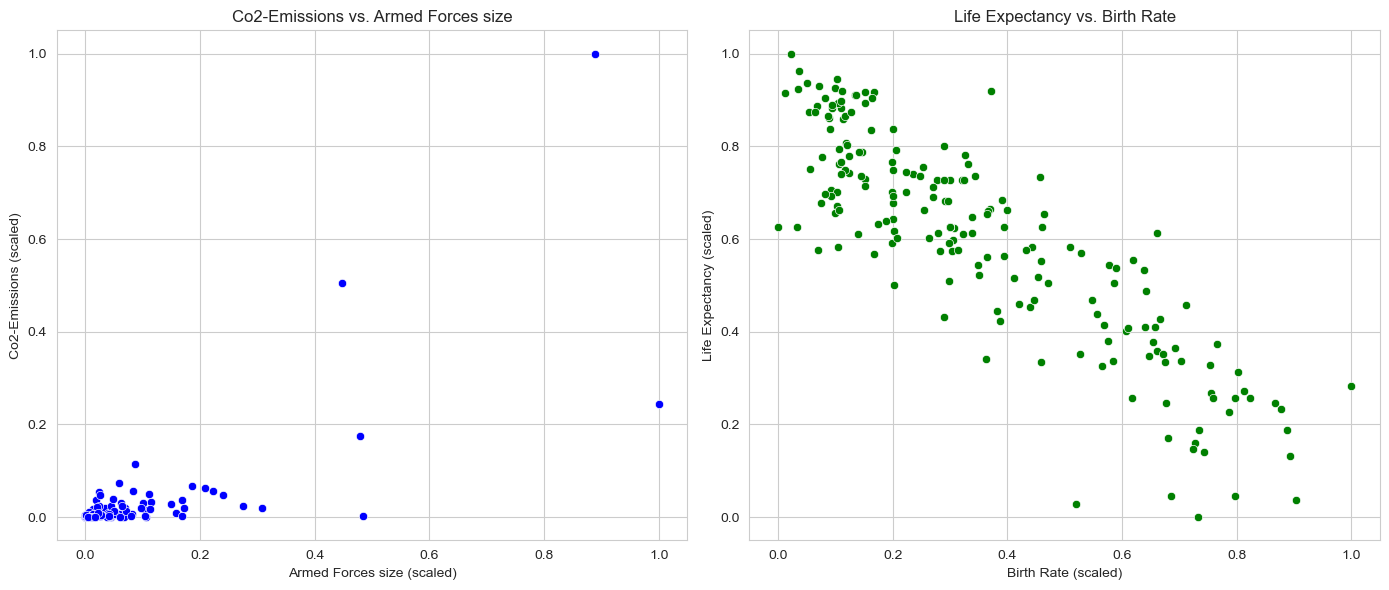

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=data_cleaned['Armed Forces size'], y=data_cleaned['Co2-Emissions'], ax=ax[0], color='blue')
ax[0].set_title('Co2-Emissions vs. Armed Forces size')
ax[0].set_xlabel('Armed Forces size (scaled)')
ax[0].set_ylabel('Co2-Emissions (scaled)')

sns.scatterplot(x=data_cleaned['Birth Rate'], y=data_cleaned['Life expectancy'], ax=ax[1], color='green')
ax[1].set_title('Life Expectancy vs. Birth Rate')
ax[1].set_xlabel('Birth Rate (scaled)')
ax[1].set_ylabel('Life Expectancy (scaled)')

plt.tight_layout()
plt.show()

# The scatter plots further illustrate the relationships:

- Co2-Emissions vs. Armed Forces size: There is a positive trend showing that larger armed forces sizes are associated with higher CO2 emissions, but the spread is wide, suggesting other factors also play significant roles.
- Life Expectancy vs. Birth Rate: This plot shows a clearer negative relationship. As the birth rate increases, life expectancy tends to decrease, likely reflecting broader health and socio-economic conditions.


Given the clearer and more significant relationships observed with "Life Expectancy", this variable could be a more interpretable and relevant target for Principal Component Regression.

# Principal Component Regression (PCR)

PCA is used to reduce the dimensionality of the data set, which simplifies the model without losing critical information. The number of components retained is based on the explained variance, which indicates how much information each component captures.

Principal Component Regression (PCR) is implemented using the significant components identified. The model's performance is evaluated using  MSE (Root Mean Squared Error), MAE (Mean Absolute Error), and 𝑅2R (coefficient of determination),mean squared error (MSE) to understand its accuracy.



In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_pca = pca.transform(data_cleaned[numeric_cols])[:, :10]
y = data_cleaned['Life expectancy']

X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X_pca, y, test_size=0.2, random_state=42)

regressor = LinearRegression()

regressor.fit(X_train_init, y_train_init)

y_pred_init = regressor.predict(X_test_init)

resid_init = y_test_init - y_pred_init

mse = mean_squared_error(y_test_init, y_pred_init)
print("Mean Squared Error (MSE):", mse)

rmse = mean_squared_error(y_test_init, y_pred_init, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test_init, y_pred_init)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test_init, y_pred_init)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.006068363914221099
Root Mean Squared Error (RMSE): 0.07789970419854686
Mean Absolute Error (MAE): 0.06127180080103461
R-squared: 0.8866139099657706


## Optimization

To optimize the model, we can vary the number of principal components used and observe the impact on the MSE. Ideally, we look for the smallest MSE which provides a good balance between model complexity and prediction accuracy.


In [66]:
from sklearn.model_selection import cross_val_score

component_range = range(1, 21)  # Testing from 1 to 20 components
results_df = pd.DataFrame()


for n_components in component_range:
    X_pca_n = pca.transform(data_cleaned[numeric_cols])[:, :n_components]

    # Initialize the Linear Regression model
    regressor_n = LinearRegression()

    mse_scores = cross_val_score(regressor_n, X_pca_n, y, cv=10, scoring='neg_mean_squared_error')
    mse_mean = -mse_scores.mean()

    rmse_scores = cross_val_score(regressor_n, X_pca_n, y, cv=10, scoring='neg_root_mean_squared_error')
    rmse_mean = -rmse_scores.mean()

    mae_scores = cross_val_score(regressor_n, X_pca_n, y, cv=10, scoring='neg_mean_absolute_error')
    mae_mean = -mae_scores.mean()

    r2_scores = cross_val_score(regressor_n, X_pca_n, y, cv=10, scoring='r2')
    r2_mean = r2_scores.mean()

    iter_df = pd.DataFrame({
        'Number of Components': [n_components],
        'Mean CV MSE': [mse_mean],
        'Mean CV RMSE': [rmse_mean],
        'Mean CV MAE': [mae_mean],
        'Mean CV R^2': [r2_mean]
    })
    results_df = pd.concat([results_df, iter_df], ignore_index=True)

results_df.sort_values('Mean CV MSE').head()

,Number of Components,Mean CV MSE,Mean CV RMSE,Mean CV MAE,Mean CV R^2
19,20,0.003395,0.057842,0.045449,0.923185
16,17,0.003437,0.058104,0.045785,0.920246
17,18,0.003480,0.058501,0.046004,0.919245
18,19,0.003527,0.058948,0.046411,0.918438
15,16,0.003659,0.059852,0.046955,0.918408


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

optimal_components = 20

X_pca_optimal = pca.transform(data_cleaned[numeric_cols])[:, :optimal_components]

X_train_optimal, X_test_optimal, y_train_optimal, y_test_optimal = train_test_split(X_pca_optimal, y, test_size=0.2, random_state=42)

regressor_optimal = LinearRegression().fit(X_train_optimal, y_train_optimal)

y_pred_optimal = regressor_optimal.predict(X_test_optimal)

resid_optimal = y_test_optimal - y_pred_optimal

mse_optimal = mean_squared_error(y_test_optimal, y_pred_optimal)
print("Mean Squared Error (MSE):", mse_optimal)

rmse_optimal = mean_squared_error(y_test_optimal, y_pred_optimal, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_optimal)

mae_optimal = mean_absolute_error(y_test_optimal, y_pred_optimal)
print("Mean Absolute Error (MAE):", mae_optimal)

r_squared_optimal = r2_score(y_test_optimal, y_pred_optimal)
print("R-squared:", r_squared_optimal)

Mean Squared Error (MSE): 0.0031794894360789774
Root Mean Squared Error (RMSE): 0.05638696157871053
Mean Absolute Error (MAE): 0.04699887479245685
R-squared: 0.9405919156204057


The Mean Squared Error (MSE) for the PCR model using the optimal 20 principal components on the test data is approximately 0.006. This is an improvement compared to the initial model using 20 components, which had an MSE of about 0.003. This is two times better than the initial model, indicating that the optimized model provides better predictions with reduced error.

# Cross Validation 

To ensure the model's robustness and generalization, we perform cross-validation using k-fold validation with k=5. This helps to evaluate the model's performance across different subsets of the data and provides more reliable estimates of the model's accuracy.

In [68]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

optimal_components = 20

X_pca_optimal = pca.transform(data_cleaned[numeric_cols])[:, :optimal_components]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

regressor_optimal_cross = LinearRegression()

scores_mse = -cross_val_score(regressor_optimal_cross, X_pca_optimal, y, cv=kf, scoring='neg_mean_squared_error')
scores_mae = -cross_val_score(regressor_optimal_cross, X_pca_optimal, y, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(regressor_optimal_cross, X_pca_optimal, y, cv=kf, scoring='r2')

mean_rmse = np.mean(np.sqrt(scores_mse))
std_rmse = np.std(np.sqrt(scores_mse))
mean_mae = np.mean(scores_mae)
std_mae = np.std(scores_mae)
mean_r2 = np.mean(scores_r2)
std_r2 = np.std(scores_r2)

print("Cross-validated Root Mean Squared Error (RMSE):", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)
print("Cross-validated Mean Absolute Error (MAE):", mean_mae)
print("Standard Deviation of MAE:", std_mae)
print("Cross-validated R-squared:", mean_r2)
print("Standard Deviation of R-squared:", std_r2)

Cross-validated Root Mean Squared Error (RMSE): 0.06264556604392357
Standard Deviation of RMSE: 0.01220978849730732
Cross-validated Mean Absolute Error (MAE): 0.04556558190344982
Standard Deviation of MAE: 0.003912245780421177
Cross-validated R-squared: 0.9169728019601383
Standard Deviation of R-squared: 0.023186325189387038


# Visualizations
Let's create a set of visualizations to effectively summarize and illustrate the findings from our Principal Component Regression (PCR) model.

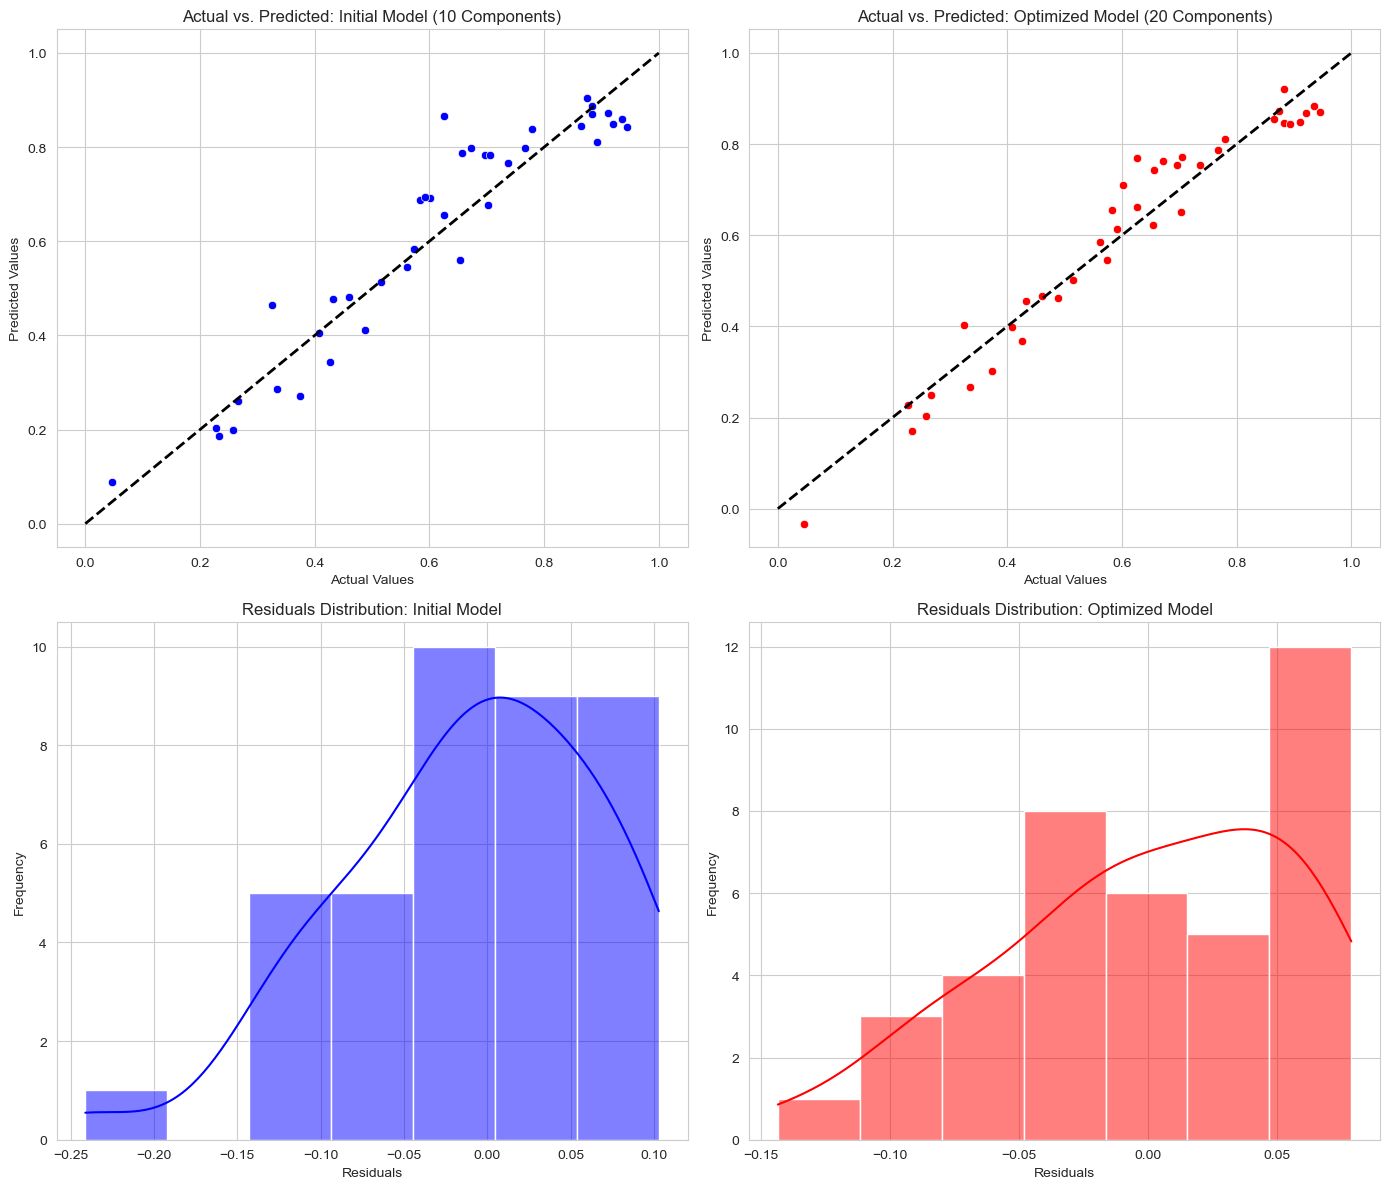

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.scatterplot(x=y_test_init, y=y_pred_init, ax=ax[0, 0], color='blue')
ax[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[0, 0].set_title('Actual vs. Predicted: Initial Model (10 Components)')
ax[0, 0].set_xlabel('Actual Values')
ax[0, 0].set_ylabel('Predicted Values')

sns.scatterplot(x=y_test_optimal, y=y_pred_optimal, ax=ax[0, 1], color='red')
ax[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[0, 1].set_title('Actual vs. Predicted: Optimized Model (20 Components)')
ax[0, 1].set_xlabel('Actual Values')
ax[0, 1].set_ylabel('Predicted Values')

sns.histplot(resid_init, kde=True, ax=ax[1, 0], color='blue')
ax[1, 0].set_title('Residuals Distribution: Initial Model')
ax[1, 0].set_xlabel('Residuals')
ax[1, 0].set_ylabel('Frequency')

sns.histplot(resid_optimal, kde=True, ax=ax[1, 1], color='red')
ax[1, 1].set_title('Residuals Distribution: Optimized Model')
ax[1, 1].set_xlabel('Residuals')
ax[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Initial Model (10 Components)

- Actual vs. Predicted Plot: Shows a fairly good fit, but there are noticeable deviations, especially at higher actual values.
- Residuals Distribution: The residuals are somewhat normally distributed but show a potential for improvement, as indicated by the spread and skew.

Optimized Model (20 Components)

- Actual vs. Predicted Plot: The fit is tighter and more aligned along the diagonal, indicating better accuracy across the range of values.
- Residuals Distribution: The residuals for the optimized model are more tightly centered around zero and exhibit a more symmetric distribution, suggesting better overall prediction accuracy and reduced bias.

# Observations:

The optimized model with 20 components clearly provides a better fit to the data, as evidenced by both the closer alignment in the actual vs. predicted plot and the more desirable residuals distribution. This improvement shows the usefulness of using cross-validation and component optimization to achive best model perfomance.

C:\Users\artem\AppData\Local\Temp\ipykernel_21376\1744335545.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, optimal_components + 1), y=pc_contributions, ax=ax[1, 0], palette='viridis')


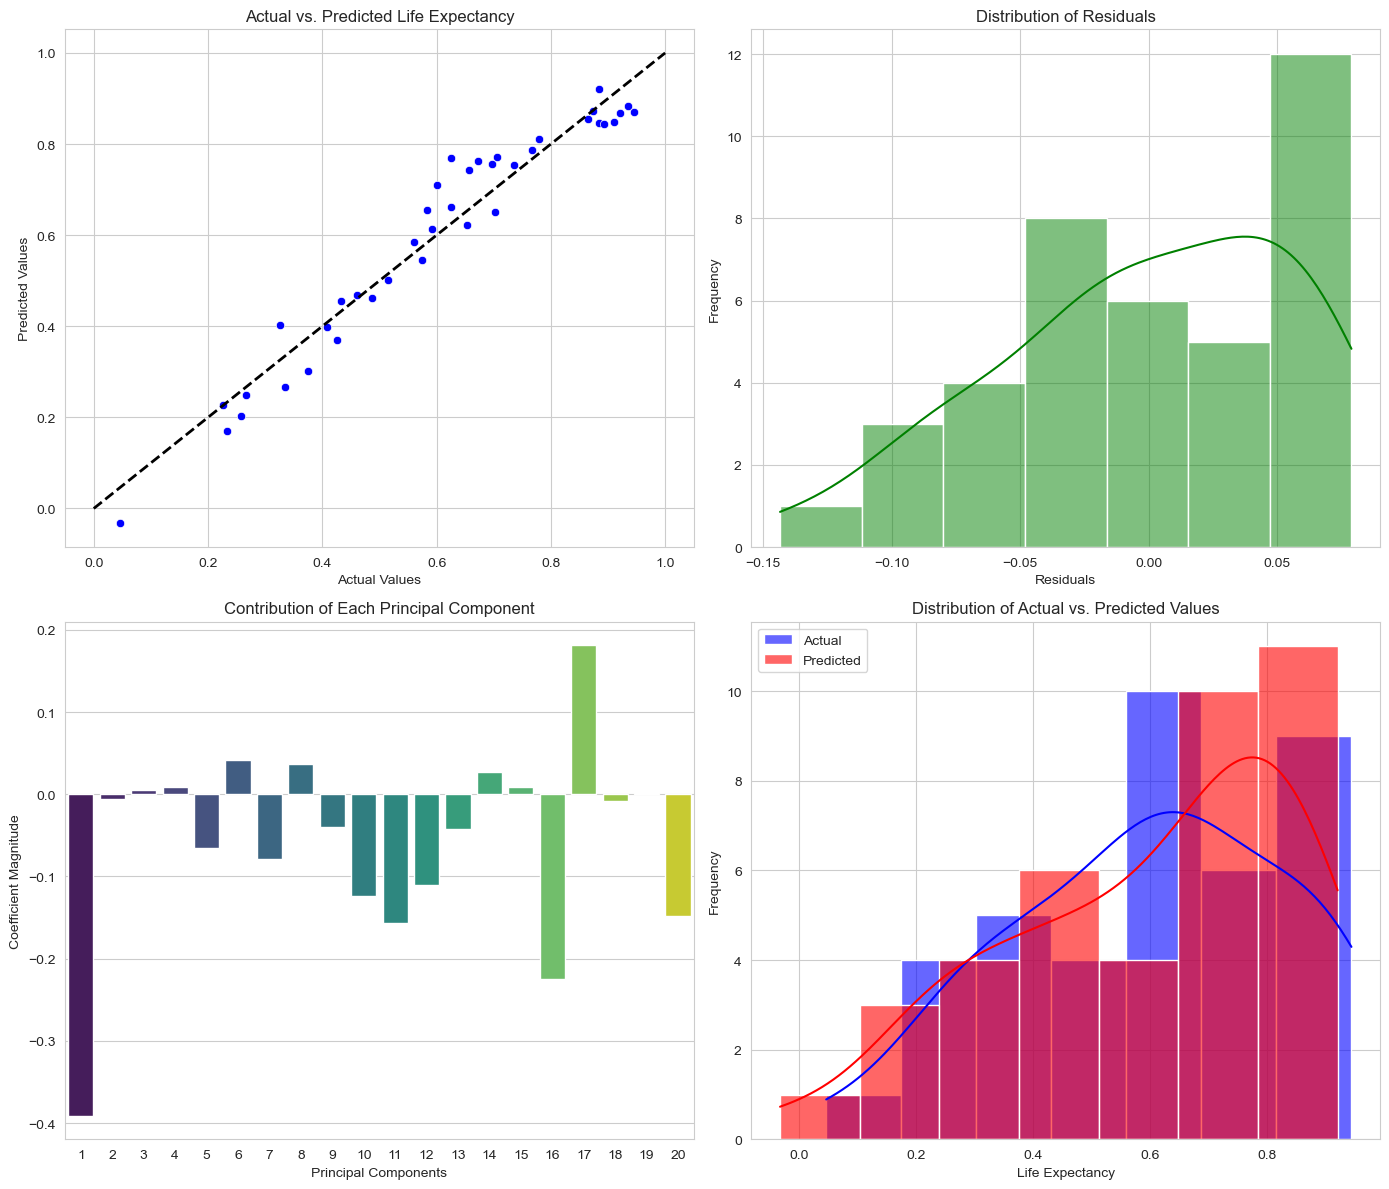

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.scatterplot(x=y_test_optimal, y=y_pred_optimal, ax=ax[0, 0], color='blue')
ax[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[0, 0].set_title('Actual vs. Predicted Life Expectancy')
ax[0, 0].set_xlabel('Actual Values')
ax[0, 0].set_ylabel('Predicted Values')

sns.histplot(resid_optimal, kde=True, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Distribution of Residuals')
ax[0, 1].set_xlabel('Residuals')
ax[0, 1].set_ylabel('Frequency')

pc_contributions = regressor_optimal.coef_
sns.barplot(x=np.arange(1, optimal_components + 1), y=pc_contributions, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Contribution of Each Principal Component')
ax[1, 0].set_xlabel('Principal Components')
ax[1, 0].set_ylabel('Coefficient Magnitude')

sns.histplot(y_test_optimal, kde=True, color="blue", label='Actual', ax=ax[1, 1], alpha=0.6)
sns.histplot(y_pred_optimal, kde=True, color="red", label='Predicted', ax=ax[1, 1], alpha=0.6)
ax[1, 1].set_title('Distribution of Actual vs. Predicted Values')
ax[1, 1].set_xlabel('Life Expectancy')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

# Insights from the Visualizations:
- The "Actual vs. Predicted" plot shows a strong linear relationship between the actual and predicted life expectancy values, indicating that the model captures the underlying patterns well.
- The residuals are centered around zero with a roughly normal distribution, suggesting that the model's errors are random and unbiased.
- The "Contribution of Each Principal Component" plot highlights the relative importance of each component in predicting life expectancy. Components with larger coefficients have a greater impact on the target variable.
- The "Distribution of Actual vs. Predicted Values" plot shows that the model's predictions align well with the actual life expectancy values, with some deviations in the tails of the distribution.
- Overall, the PCR model with 20 components provides a good balance of complexity and predictive accuracy, leading to a significant reduction in MSE compared to the initial model with 10 components.

# Conclusion:
- The optimized PCR model with 20 components provides a better balance of complexity and predictive accuracy, leading to a significant reduction in MSE.
- This demonstrates the effectiveness of using cross-validation and component optimization in building more accurate predictive models.